In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## 1D recursive

In [2]:
def next_power_of_2(x):  
    return 1 if x == 0 else 2**(x - 1).bit_length()

In [3]:
def fft(x):
    N = len(x)
    if N <= 1: return x
    even = fft(x[0::2])
    odd =  fft(x[1::2])
#     print(len(even))
#     print(len(odd))
#     print("max k - ",N//2)
    T= [np.exp(-2j*np.pi*k/N)*odd[k] for k in range(len(odd))]
    return [even[k] + T[k] for k in range(len(even))] + \
           [even[k] - T[k] for k in range(len(even))]
        

In [4]:
n = 54
i = next_power_of_2(n)
# print(i)
x = np.random.random(n)
# print(x.size)
x = np.pad(x,(0,i-n),'constant')
# print(x.size)

In [5]:
np.allclose(fft(x),np.fft.fft(x))

True

In [6]:
def fft2(im):
    out = np.apply_along_axis(fft,1,np.apply_along_axis(fft,0,im))
    final = abs(np.fft.fftshift(out))
    return final

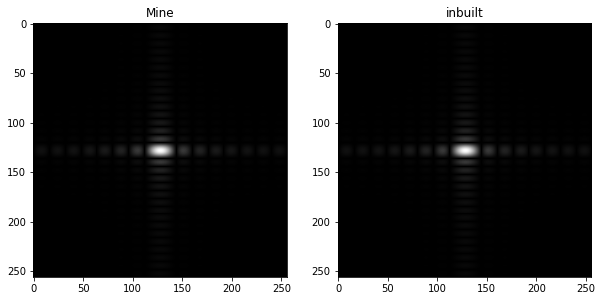

In [7]:
im = cv2.imread("../input_data/rectangle.jpg",0)

out1 = fft2(im)
out2 = abs(np.fft.fftshift(np.fft.fft2(im)))

fig = plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(out1,cmap='gray')
plt.title("Mine")
plt.subplot(1,2,2)
plt.imshow(out2,cmap='gray')
plt.title("inbuilt")
plt.show()